In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-14 11:06:49.865868: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-14 11:06:49.902184: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-14 11:06:50.424352: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')
df_Betara_ind = pd.DataFrame(df[['Ano','Betara_ind']])

dados = df_Betara_ind.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1982,1983,1984,1985,1986,1987,1988,1990,1991,1992,1993,1994,1995,1997,2000,2001,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Betara_ind'].values
dados.head()

,Ano,Betara_ind
39,1989,2.0
46,1996,0.5
48,1998,1.5
49,1999,0.5
52,2002,0.5


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=300, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Betara/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/300


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step - loss: 0.9719
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9205
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8745
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8300
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7865
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7471
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7165
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6985
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6857
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6663
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6393
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6111
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5899
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5792
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5790
Epoch 16/300
1/1 ━━━━━━━━━━━━━

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Betara/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[2.6229382]
 [2.5410085]
 [2.4530354]
 [2.354111 ]
 [2.2524588]
 [2.149564 ]
 [2.0452514]
 [1.7982662]
 [1.6499791]
 [1.5006607]
 [1.3513484]
 [1.2020252]
 [1.057159 ]
 [0.8555193]
 [0.6309633]
 [0.5803461]
 [7.3435955]]


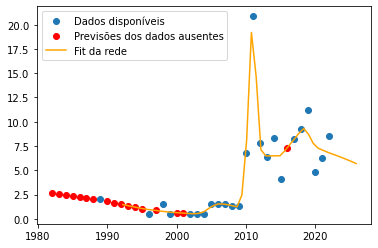

In [6]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

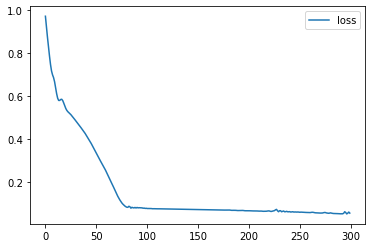

In [7]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [8]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Betara_ind':prev_ausentes.flatten()})

df_preenchido = pd.concat((dados,df_previsoes)).sort_values('Ano')

df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Betara/Interpolações e Extrapolações Betara_ind.xlsx')

df_preenchido

,Ano,Betara_ind
0,1982,2.622938
1,1983,2.541008
2,1984,2.453035
3,1985,2.354111
4,1986,2.252459
5,1987,2.149564
6,1988,2.045251
39,1989,2.000000
7,1990,1.798266
8,1991,1.649979
